In [2]:
import random
import sklearn
import sklearn.datasets 
import sklearn.svm as svm
import numpy as np
from matplotlib import pyplot as plt

# Tell matplotlib to show the plots within the notebook.
%matplotlib inline

Welcome to the second part of Assignment 1. Please remember that there is another Notebook together with this :) 

In this Notebook we will start by downloading a small digits dataset and visualizing some samples. Afterwards, we will learn how to split our data to train-validation-test splits in order to train a linear classifier. Don't worry, we will use existing library for training the classifier. Our focus is mainly on splitting the data and being able to process the output of a classifier. 

You will learn how to convert raw outputs to predictions and probability distributions. We will also do a very small hyper-parameter tuning over our validation set. 

In [3]:
digits = sklearn.datasets.load_digits()

In [15]:
digits.data[1] 

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

Visualize some images! 

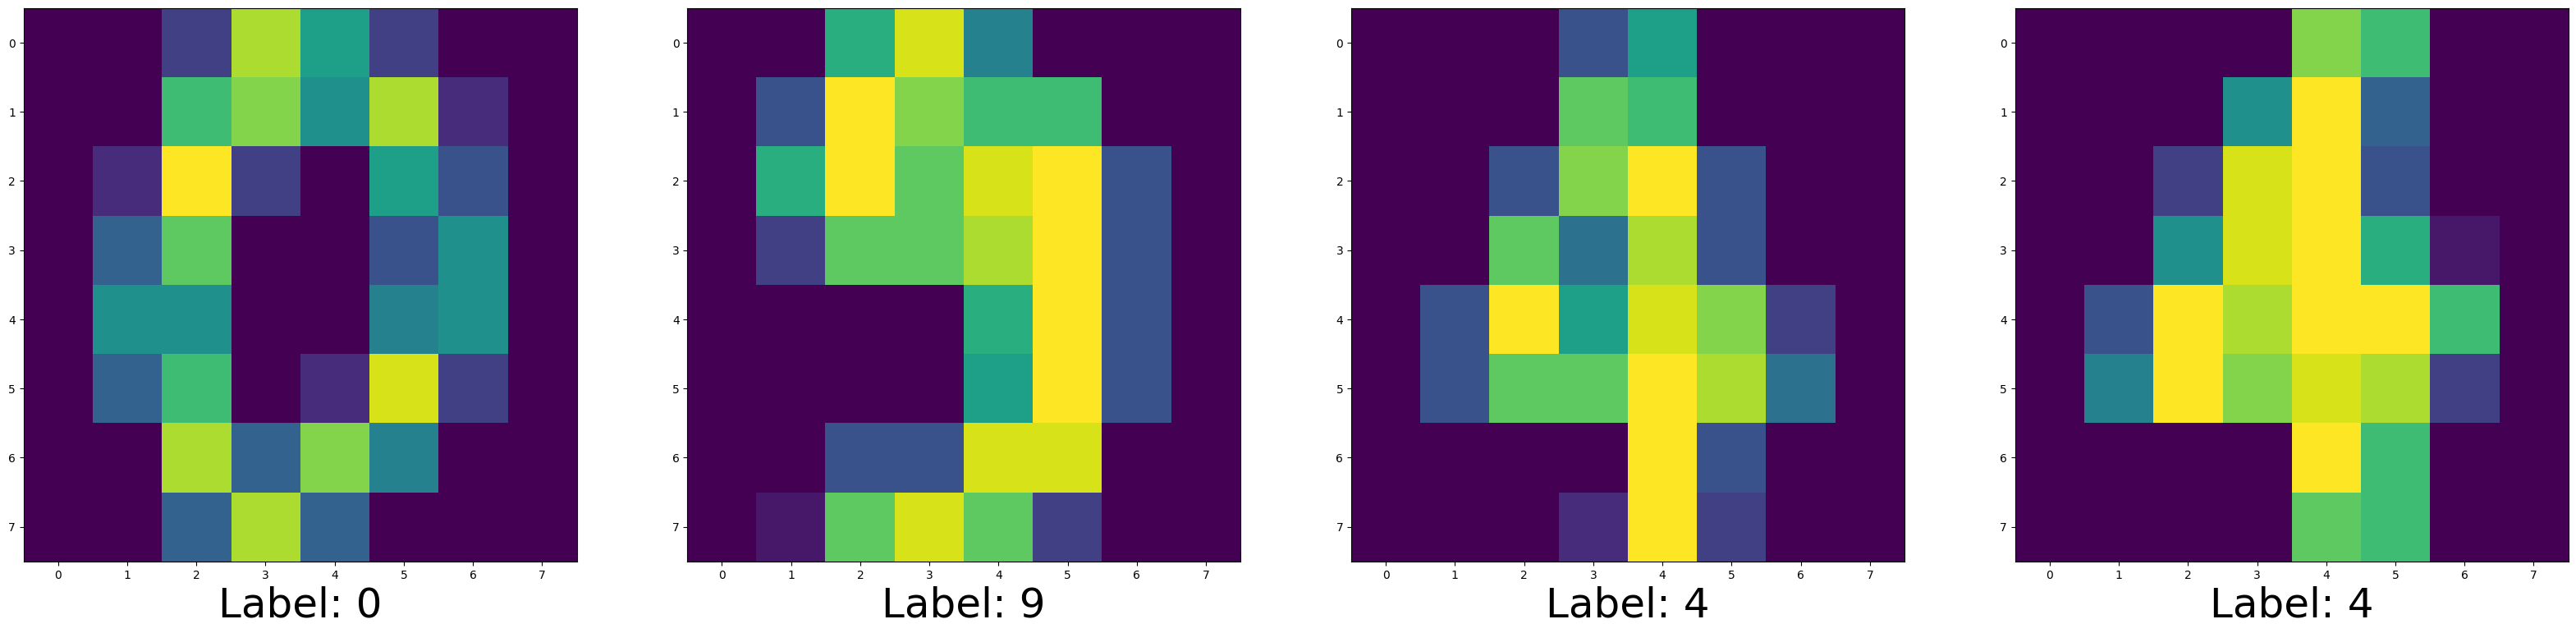

In [4]:
n = 4
random_indices = [random.randint(0, len(digits.images)) for i in range(n)]

fig, axes = plt.subplots(1, n, figsize=(40*1, 40*n))

for _col, sample_idx in enumerate(random_indices):
    img, lbl = digits.images[sample_idx], digits.target[sample_idx]
    axes[_col].imshow(img)
    axes[_col].set_xlabel(f"Label: {lbl}", fontsize=36) 

plt.show()

In [19]:
def train_test_split(data, target, fraction):
    ########  TODO ########################
    # 1. Shuffle the data and targets
    indices = np.arange(len(data))
    np.random.shuffle(indices)
    data = data[indices]
    target = target[indices]
    # 2. Split it based on the fraction
    split = int(len(data) * fraction)
    # 3. Return (train_1, target_1, train_2, target_2of two splits
    data_train, target_train, data_test, target_test = data[:split], target[:split], data[split:], target[split:]
	# You `cannot` use train_test_split function provided by some library.
	# You are however welcome to look into their source code to see how one does this if it helps.
 
    #data_train = target_train = data_test = target_test = None # Remove this
    #######################################
    return data_train, target_train, data_test, target_test

In [20]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [24]:
# Split data into 50% train and 50% test subsets
X_trainval, y_trainval, X_test, y_test = \
    train_test_split( 
        data = data,
        target = digits.target,
        fraction = 0.5
        # randomly selectd test set from the data.
    )

# Now Split the TRAIN data into 80% train and 20% validation subsets
X_train, y_train, X_val, y_val = \
    train_test_split( 
        data = X_trainval,
        target = y_trainval,
        fraction = 0.8
    )

In [25]:
print(f"{X_train.shape=} {y_train.shape=}")
print(f"{X_val.shape=} {y_val.shape=}")
print(f"{X_test.shape=} {y_test.shape=}")

X_train.shape=(718, 64) y_train.shape=(718,)
X_val.shape=(180, 64) y_val.shape=(180,)
X_test.shape=(899, 64) y_test.shape=(899,)


In [44]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.00001)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the val subset
output = clf.decision_function(X_val)

print(f"Model output has shape {output.shape}")


########  TODO ########################
# Use the (N, 10) outputs to get (N,) predictions (i.e class labels)
preds = output.argmax(axis = 1)
########################################

Model output has shape (180, 10)


In [45]:
def accuracy_top1(predictions, targets):
    ########  TODO ########################
    # Return the mean accuracy (range from [0, 100])
    top1_acc = np.mean(predictions == targets)
    return top1_acc # replace with accuracy
    ########################################

In [46]:
print(f"Cross-validation accuracy is {accuracy_top1(preds, y_val):0.3f}")

Cross-validation accuracy is 0.756


Go back to the previous cell and try different gamma values [0.1 0.01 0.001 0.0001 0.00001] for the classifier configuration and report results for each over the `val` set. Simply replace the written 0.1 value.


Please write down your tested values and results here. Which gamma value worked best on the val set?


- ```gamma = 0.1``` : accuracy = 0.083
- ```gamma = 0.01``` : accuracy = 0.461
- ```gamma = 0.001``` : accuracy = 0.978
- ```gamma = 0.0001``` : accuracy = 0.944
- ```gamma = 0.00001``` ; accuracy = 0.661

#### The best gamma value is ```0.001```

In [47]:
# Now insert your best gamma value and train the model again.
best_gamma_value = 0.001 # Replace this with your best finding!

clf = svm.SVC(gamma=best_gamma_value)
# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
output = clf.decision_function(X_test)

########  TODO ########################
# Use the (N, 10) outputs to get (N,) predictions (i.e class labels)
preds = output.argmax(axis = 1)
########################################

In [48]:
print(f"Final test accuracy is {accuracy_top1(preds, y_test):0.3f}")

Final test accuracy is 0.984


In [54]:
def softmax(x):
    """
    Args       x: Numpy array of shape (N, num_classes) with real values
    Returns    Numpy array of shape (N, num_classes) with softmax probability scores
    """
    ########  TODO ########################
    # return per-sample softmax scores
    e_x = np.exp(x)
    d = np.sum(e_x, axis = 1, keepdims = True)
    return (e_x/d)
    ########################################

########  TODO ########################
# Using the softmax function defined above, convert (N, 10) outputs 
#to (N,) Softmax probabilities for the predicted class
#scores = []
probs = softmax(output)
preds = np.argmax(probs, axis = 1)
scores = probs[np.arange(len(probs)), preds]
########################################

Visualize some of the test predictions!

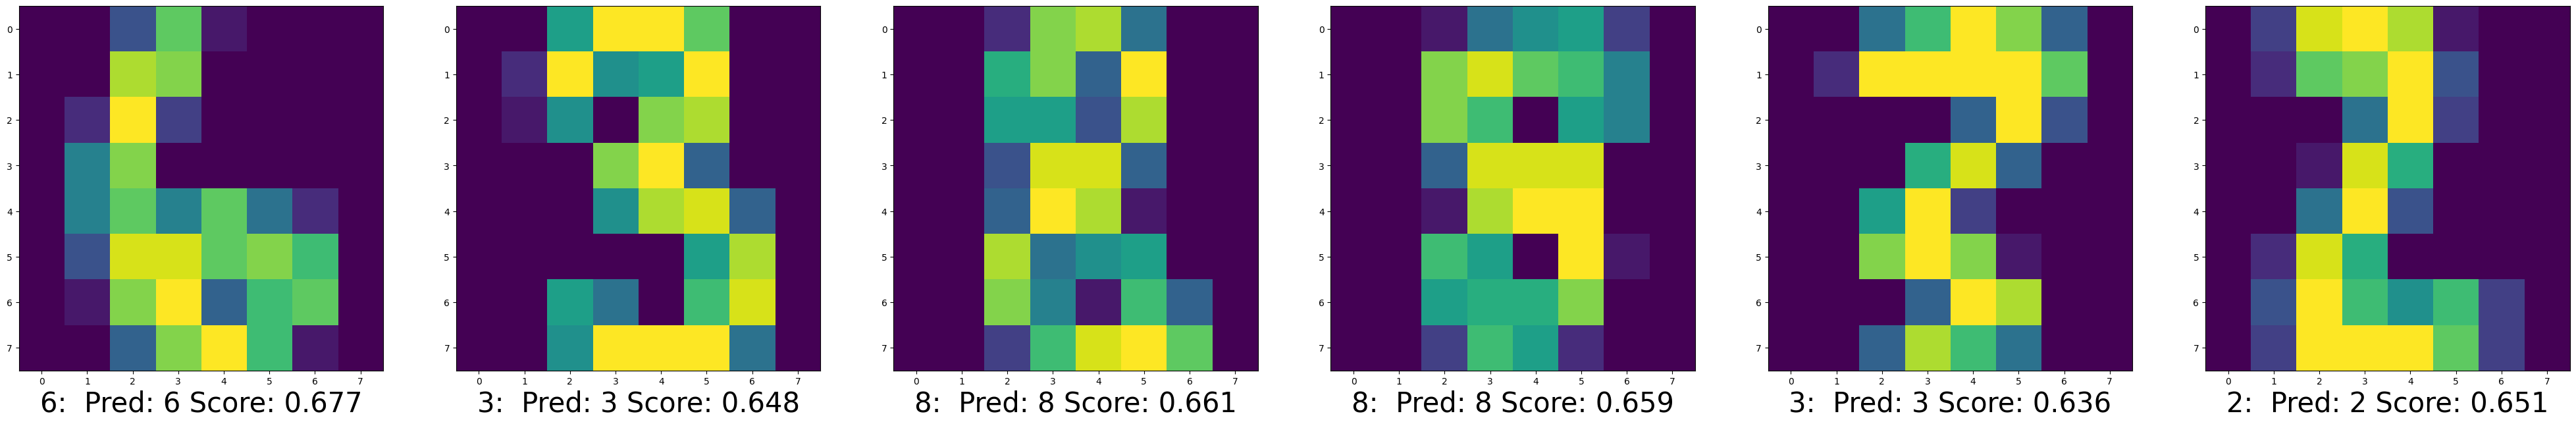

In [55]:
n = 6
random_indices = [random.randint(0, len(X_test)) for i in range(n)]
fig, axes = plt.subplots(1, n, figsize=(50*1, 50*n))


for _col, sample_idx in enumerate(random_indices):
    img = X_test[sample_idx].reshape((8, 8))
    lbl = y_test[sample_idx]

    axes[_col].imshow(img)
    axes[_col].set_xlabel(
        f"{lbl}:  Pred: {preds[sample_idx]} Score: {scores[sample_idx]:0.3f}",
        fontsize=30
    )

plt.show()